In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix

#Read Data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Drugs_For_Decision_Tree/drug200.csv')

In [5]:
data_copy = data.copy()

In [6]:
data_copy.shape

(200, 6)

In [8]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
data_copy.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
data_copy.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [11]:
data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [13]:
label= LabelEncoder()
data['Sex_encode']=label.fit_transform(data['Sex'])
data['BP_encode']=label.fit_transform(data['BP'])
data['Chol_encode']=label.fit_transform(data['Cholesterol'])

In [14]:
x=data[['Age','Sex_encode','BP_encode','Chol_encode','Na_to_K']]
x.head()

,Age,Sex_encode,BP_encode,Chol_encode,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [15]:
y=data.Drug
y

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [17]:
DTC = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred=DTC.predict(x_train)
y_pred.flatten()

array(['drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB', 'drugA',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugA', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugX', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'dru

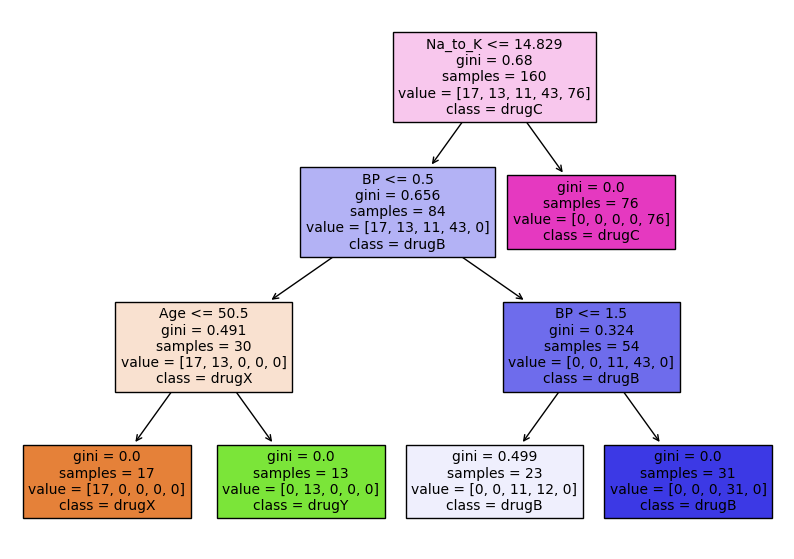

In [19]:
plt.figure(figsize=(10,7))
plot_tree(DTC, feature_names=['Age','Sex','BP','Cholesterol','Na_to_K'],
          class_names=['drugX','drugY','drugA', 'drugB','drugC'],
          filled=True, fontsize=10)
plt.show()

In [22]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        17
       drugB       1.00      1.00      1.00        13
       drugC       0.00      0.00      0.00        11
       drugX       0.80      1.00      0.89        43
       drugY       1.00      1.00      1.00        76

    accuracy                           0.93       160
   macro avg       0.76      0.80      0.78       160
weighted avg       0.88      0.93      0.90       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


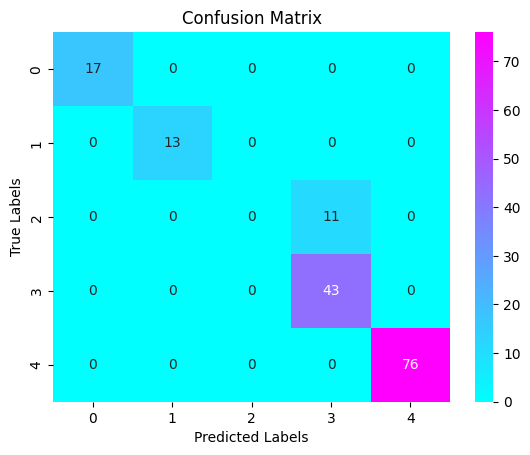

In [30]:
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, cmap='cool', fmt='d')

# Set plot labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()